### Importing_Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_train=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\BigMart_Sales\Train_BigMartSales.csv")
df_test=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\BigMart_Sales\Test_BigMartSales.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Filling missing_values

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#Filling missed numerical values

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#Filling missing categorical values

In [13]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

### Exploratory Data Analysis

In [20]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
import seaborn as sns
sns.set()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


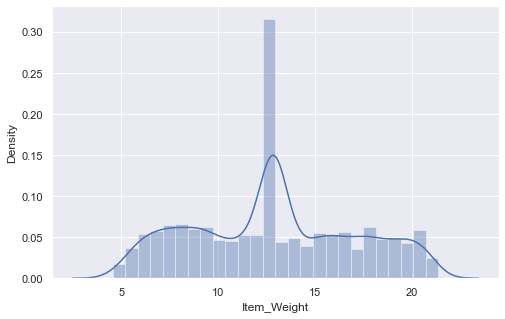

In [22]:
#Item weight distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_Weight'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


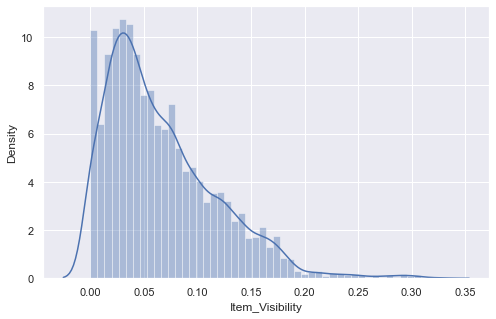

In [23]:
#Item visibility DIstribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_Visibility'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


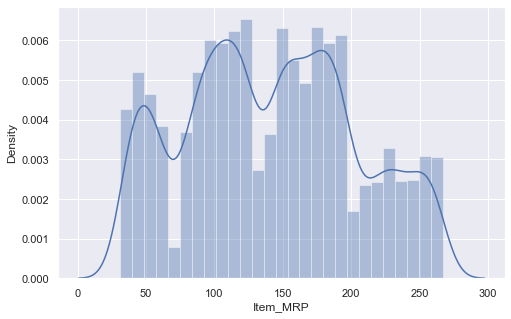

In [24]:
#Item MRP distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_MRP'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


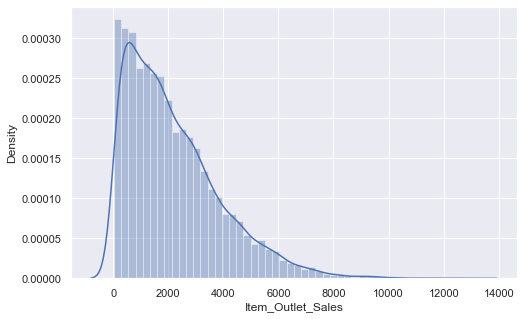

In [25]:
#Item_Sales Distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


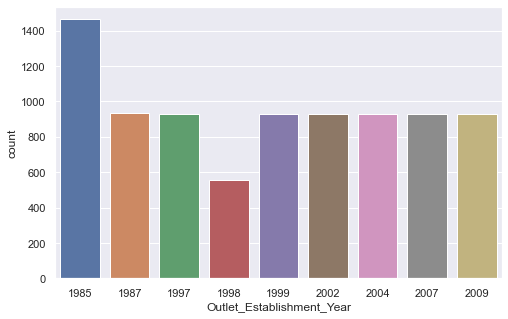

In [26]:
#Outlet_Establishment_Year
plt.figure(figsize=(8,5))
sns.countplot(df_train['Outlet_Establishment_Year'])
plt.show()   

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


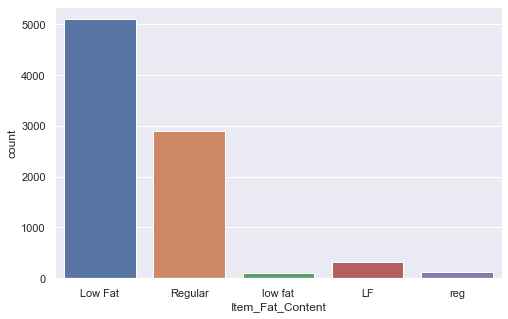

In [27]:
#Item_Fat_Content
plt.figure(figsize=(8,5))
sns.countplot(df_train['Item_Fat_Content'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


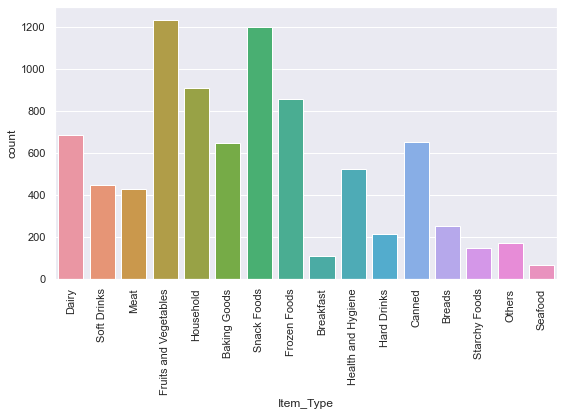

In [28]:
#Item_Type
plt.figure(figsize=(9,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Item_Type'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


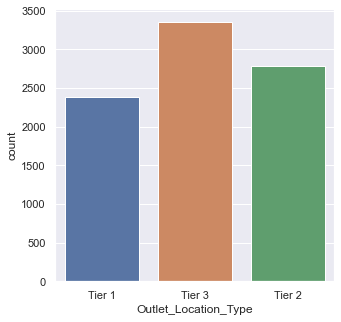

In [29]:
#Outlet location type
plt.figure(figsize=(5,5))
#plt.xticks(rotation=90)
sns.countplot(df_train['Outlet_Location_Type'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


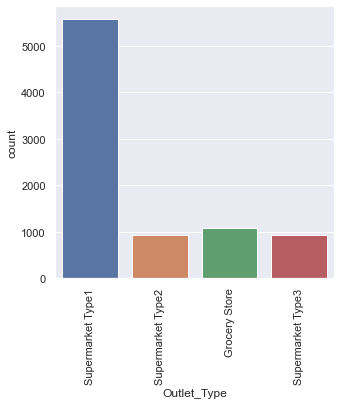

In [30]:
#Outlet_Type
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Outlet_Type'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


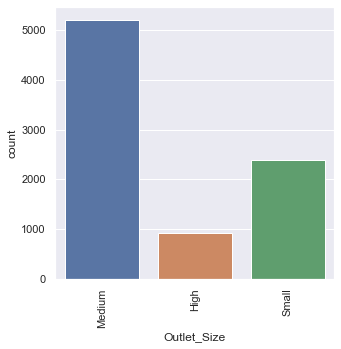

In [31]:
#Outlet_Size
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Outlet_Size'])
plt.show()

In [ ]:
# Item_Fat_Content have 5 categories out of which only three are unique.

In [32]:
df_train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df_train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df_train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [33]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label_encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [37]:
df_train['Item_Fat_Content']=encoder.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']=encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=encoder.fit_transform(df_train['Outlet_Type'])

### Splitting features and targets

In [39]:
x=df_train.drop('Item_Outlet_Sales',axis=1)

In [40]:
y=df_train['Item_Outlet_Sales']

In [41]:
print(x.shape)
print(y.shape)

(8523, 9)
(8523,)


In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [69]:
print(x.shape,xtrain.shape,xtest.shape)

(8523, 9) (6818, 9) (1705, 9)


### Feature_Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [71]:
xtrain_std= sc.fit_transform(xtrain)
xtest_std= sc.transform(xtest)

In [72]:
xtrain_std

array([[-0.80021083,  1.34421592, -0.60070308, ..., -0.28419801,
        -1.38348228, -0.25948864],
       [ 1.21131742, -0.74392811, -0.36215854, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.11665727,  1.34421592,  0.19493285, ...,  1.38332526,
        -1.38348228, -0.25948864],
       ...,
       [ 1.11665727, -0.74392811, -0.91693149, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.76744582, -0.74392811, -0.22818684, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.82084429, -0.74392811, -0.95485942, ...,  1.38332526,
        -1.38348228, -0.25948864]])

In [73]:
xtest_std

array([[ 0.33571101, -0.74392811, -0.77388703, ..., -1.95172128,
         1.08416512, -0.25948864],
       [-1.17175193, -0.74392811,  0.09797779, ...,  1.38332526,
        -1.38348228, -0.25948864],
       [ 0.38304109,  1.34421592, -0.48194218, ..., -0.28419801,
        -1.38348228, -0.25948864],
       ...,
       [ 0.38304109,  1.34421592, -0.48385674, ..., -1.95172128,
         1.08416512, -0.25948864],
       [-0.72921571,  1.34421592,  1.46010317, ..., -0.28419801,
         1.08416512,  0.9908248 ],
       [-1.17766819, -0.74392811, -0.21387994, ..., -0.28419801,
        -0.14965858, -0.25948864]])

In [103]:
import joblib

In [104]:
joblib.dump(sc,r"C:\Model\sc.sav")

['C:\\Model\\sc.sav']

### Model_Building

Using Linear Regression Algorithm

In [74]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [75]:
lr.fit(xtrain_std,ytrain)

LinearRegression()

In [76]:
Y_pred_lr=lr.predict(xtest_std)

In [77]:
y_pred_lr=lr.predict(xtrain_std)

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
print(r2_score(ytest,Y_pred_lr))
print(r2_score(ytrain,y_pred_lr))
print(mean_absolute_error(ytest,Y_pred_lr))
print(np.sqrt(mean_squared_error(ytest,Y_pred_lr)))

0.5241348086667035
0.5037682089187423
856.0338972476161
1137.2718873641163


Using RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [91]:
rf.fit(xtrain_std,ytrain)

RandomForestRegressor(n_estimators=1000)

In [92]:
Y_pred_rf= rf.predict(xtest_std)

In [93]:
print(r2_score(ytest,Y_pred_rf))
print(r2_score(ytrain,y_pred_lr))
print(mean_absolute_error(ytest,Y_pred_rf))
print(np.sqrt(mean_squared_error(ytest,Y_pred_rf)))

0.5666945521878176
0.5037682089187423
757.036340224868
1085.224049150896


In [105]:
joblib.dump(rf,r"C:\Model\rf.sav")

['C:\\Model\\rf.sav']

### Hyper_Parameter Tuning

In [94]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(xtrain_std, ytrain)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.539 using {'n_estimators': 1000}
0.502 (0.009) with: {'n_estimators': 10}
0.536 (0.005) with: {'n_estimators': 100}
0.539 (0.003) with: {'n_estimators': 1000}


In [96]:
grid_search_forest.best_score_

0.5394139919040855

In [97]:
Y_pred_rf_grid=grid_search_forest.predict(xtest_std)

In [98]:
r2_score(ytest,Y_pred_rf_grid)

0.5657811766922871

In [99]:
import joblib

In [101]:
joblib.dump(grid_search_forest,r"C:\Model\randomforest_grid.sav")

['C:\\Model\\randomforest_grid.sav']

In [102]:
joblib.load(r"C:\Model\randomforest_grid.sav")

GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)